# Breast Cancer Survival Prediction Data wrangling




In this notebook we will load, define and clean the data loaded from https://ieee-dataport.org/open-access/seer-breast-cancer-data#files

In [23]:
#import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#sklearn packages
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

#panda profiling
#from pandas_profiling import ProfileReport

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
# from google.colab import drive
# drive.mount('/content/drive')

# !ls "/content/drive/My Drive/Springbaord/capston 2 project/data"

### 1-1: Data collection 

In [27]:
#load the dataset
# file_name = '/content/drive/My Drive/Git/Springboard/capston 2 project/data/SEER_Breast_Cancer_Dataset.csv'
file_name = '../data/SEER_Breast_Cancer_Dataset.csv'
df_raw = pd.read_csv(file_name)

In [28]:
#display the sample of data
df_raw.head()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


In [29]:
#get the summary of data
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

In [30]:
#drop the empty column 
df_raw.drop(columns = ['Unnamed: 3'], inplace = True)

In [31]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A Stage                 4024 non-null   object
 8   Tumor Size              4024 non-null   int64 
 9   Estrogen Status         4024 non-null   object
 10  Progesterone Status     4024 non-null   object
 11  Regional Node Examined  4024 non-null   int64 
 12  Reginol Node Positive   4024 non-null   int64 
 13  Survival Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
dtypes: i

### 1-2: Data Definition 

As seen in the info above, there are 10 categorical columns and 5 numerical columns.
There seems to be no null value for all the records.


To be abale to do proper statical analysis we are going to convert the categorical columns to numberical data

In [32]:
#check the columns name 
df_raw.columns

Index(['Age', 'Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [33]:
#fix "Race" and "T Stage" column name and remove the space 
df = df_raw.rename(columns={'Race ':'Race','T Stage ':'T Stage'})

In [34]:
#all the columns with object datatype 
objetc_columns = df.dtypes[df.dtypes == object]
objetc_columns.index

Index(['Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage', 'Grade',
       'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status'],
      dtype='object')

In [35]:
#Remove unnecessary text from the data
#In Grade column we just need the grades not the description, therefore it is been trimmed
print(df['Grade'].unique())
df['Grade'] = df['Grade'].apply(lambda x : x.split(';')[1].strip())
print(df['Grade'].unique())

['Moderately differentiated; Grade II' 'Poorly differentiated; Grade III'
 'Well differentiated; Grade I' 'Undifferentiated; anaplastic; Grade IV']
['Grade II' 'Grade III' 'Grade I' 'anaplastic']


In [36]:
print(df['Race'].unique())
df['Race'] = df['Race'].apply(lambda x : x.split('(')[0].strip())
print(df['Race'].unique())

['Other (American Indian/AK Native, Asian/Pacific Islander)' 'White'
 'Black']
['Other' 'White' 'Black']


In [37]:
print(df['Marital Status'].unique())
df['Marital Status'] = df['Marital Status'].apply(lambda x : x.split('(')[0].strip())
print(df['Marital Status'].unique())

['Married (including common law)' 'Divorced' 'Single (never married)'
 'Widowed' 'Separated']
['Married' 'Divorced' 'Single' 'Widowed' 'Separated']


### 1-3: Data Cleaning

In [38]:
#caluculate the VIF to check the multicollinearity 
calculate_vif(df.select_dtypes(include='number'))

,Var,Vif
0,Age,11.17
4,Survival Months,8.73
2,Regional Node Examined,4.74
1,Tumor Size,3.08
3,Reginol Node Positive,2.14


In [39]:
# dropping the feature with the high VIF
df_dropped = df.drop(df[['Age']],axis=1)
calculate_vif(df_dropped.select_dtypes(include='number'))

,Var,Vif
1,Regional Node Examined,4.36
3,Survival Months,3.83
0,Tumor Size,2.86
2,Reginol Node Positive,2.13


In [40]:
#all the columns with object datatype 
objetc_columns = df_dropped.dtypes[df_dropped.dtypes == object]
objetc_columns.index
features = list(objetc_columns.index)

In [57]:
#devide the dataset to featurs and target
features  = df_dropped.drop('Status',axis = 1)
target = df_dropped['Status']

In [58]:
## Call get_dummies() to one-hot encode all features in the training set
features = pd.get_dummies(features,drop_first = True)

In [76]:
# Encode TARGET Columns using LabelEncoder
le = preprocessing.LabelEncoder()
target = pd.DataFrame(le.fit_transform(target).reshape(-1,1),columns = ['Status'])

In [77]:
df_labeled = pd.concat([features, target], axis=1)

In [78]:
#confirm all the categorical data are converted to numberical data types
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Tumor Size                    4024 non-null   int64
 1   Regional Node Examined        4024 non-null   int64
 2   Reginol Node Positive         4024 non-null   int64
 3   Survival Months               4024 non-null   int64
 4   Race_Other                    4024 non-null   uint8
 5   Race_White                    4024 non-null   uint8
 6   Marital Status_Married        4024 non-null   uint8
 7   Marital Status_Separated      4024 non-null   uint8
 8   Marital Status_Single         4024 non-null   uint8
 9   Marital Status_Widowed        4024 non-null   uint8
 10  T Stage_T2                    4024 non-null   uint8
 11  T Stage_T3                    4024 non-null   uint8
 12  T Stage_T4                    4024 non-null   uint8
 13  N Stage_N2                    402

In [79]:
df_labeled.describe().T

,count,mean,std,min,25%,50%,75%,max
Tumor Size,4024.0,30.473658,21.119696,1.0,16.0,25.0,38.0,140.0
Regional Node Examined,4024.0,14.357107,8.099675,1.0,9.0,14.0,19.0,61.0
Reginol Node Positive,4024.0,4.158052,5.109331,1.0,1.0,2.0,5.0,46.0
Survival Months,4024.0,71.297962,22.921430,1.0,56.0,73.0,90.0,107.0
Race_Other,4024.0,0.079523,0.270587,0.0,0.0,0.0,0.0,1.0
Race_White,4024.0,0.848161,0.358909,0.0,1.0,1.0,1.0,1.0
Marital Status_Married,4024.0,0.656809,0.474834,0.0,0.0,1.0,1.0,1.0
Marital Status_Separated,4024.0,0.011183,0.105169,0.0,0.0,0.0,0.0,1.0
Marital Status_Single,4024.0,0.152833,0.359871,0.0,0.0,0.0,0.0,1.0
Marital Status_Widowed,4024.0,0.058400,0.234527,0.0,0.0,0.0,0.0,1.0


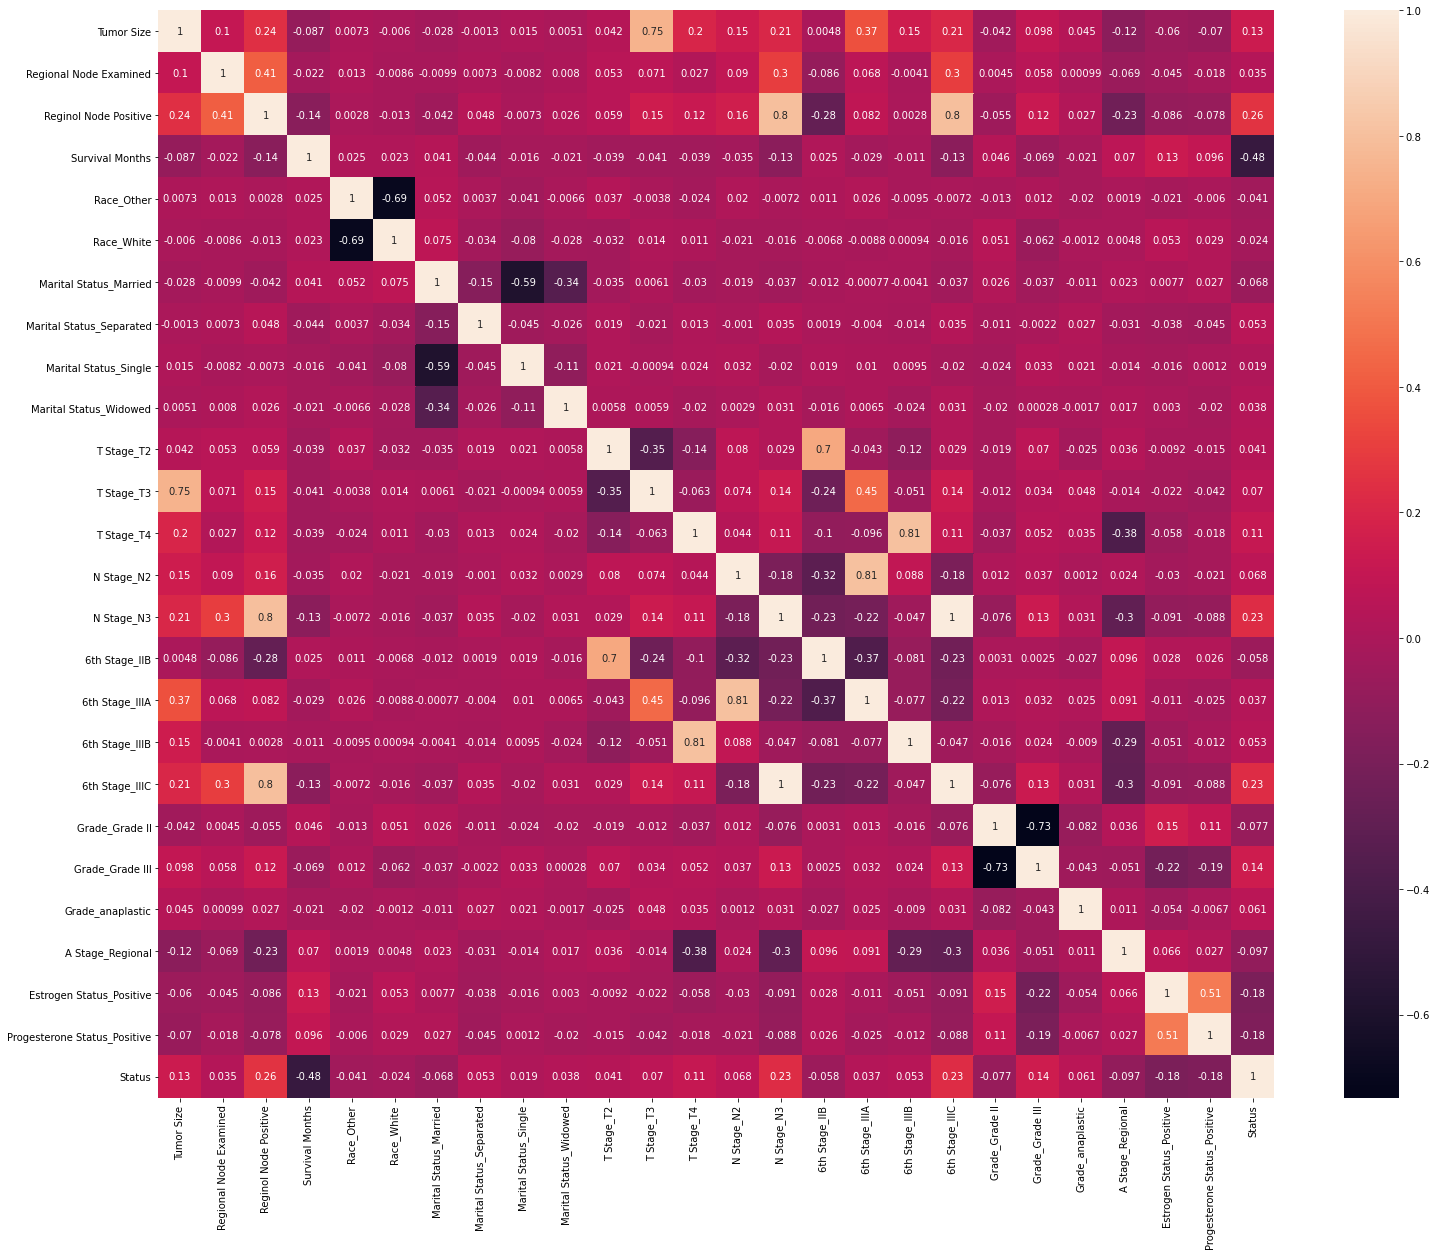

In [80]:
# draw the heatmap to display the correlation between the features
fig = plt.figure(figsize=(25, 20))
sns.heatmap(df_labeled.corr(), annot=True)
plt.show()

As seen in the above map there are some correlation between the features such as T stage,N satge and 6th stage. We will keep this in mind but will not drop it and do more investigation in EDA.

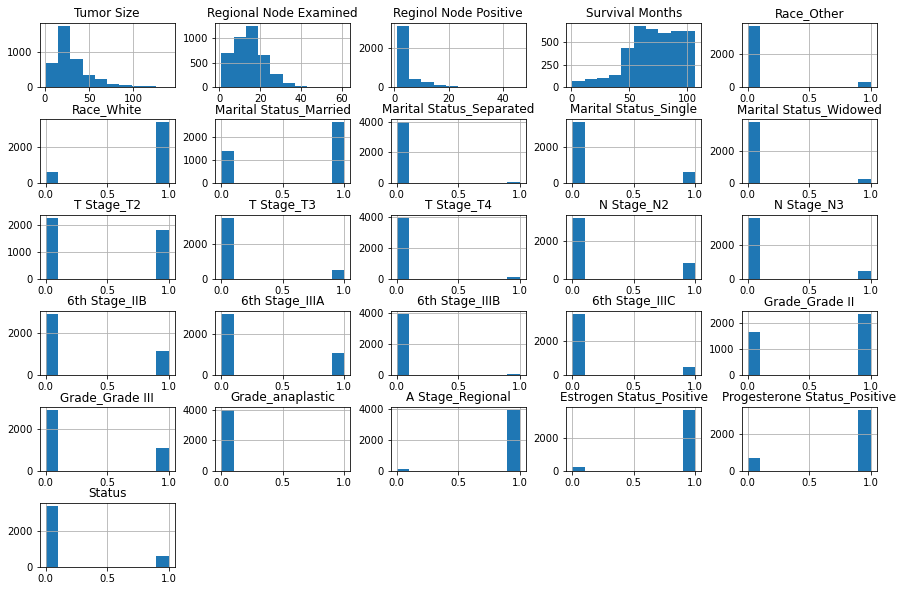

In [81]:
#Plot distributions of features
df_labeled.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);


In [91]:
#save the data
# fpath = '/content/drive/My Drive/Git/Springboard/capston 2 project/data/bc_data_cleaned_labeled.csv'
fpath = '../data/bc_data_cleaned_labeled.csv'
df_labeled.to_csv(fpath, index=False)

## As the data is imbalanced, synthetic data has been created and data is update as below

In [92]:
# fpath = '/content/drive/My Drive/Git/Springboard/capston 2 project/data/bc_data_synthetic_labeled.csv'
fpath = '../data/bc_data_synthetic.csv'
df_synth= pd.read_csv(fpath)

In [93]:
df_synth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6816 entries, 0 to 6815
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Tumor Size                    6816 non-null   int64
 1   Regional Node Examined        6816 non-null   int64
 2   Reginol Node Positive         6816 non-null   int64
 3   Survival Months               6816 non-null   int64
 4   Race_Other                    6816 non-null   int64
 5   Race_White                    6816 non-null   int64
 6   Marital Status_Married        6816 non-null   int64
 7   Marital Status_Separated      6816 non-null   int64
 8   Marital Status_Single         6816 non-null   int64
 9   Marital Status_Widowed        6816 non-null   int64
 10  T Stage_T2                    6816 non-null   int64
 11  T Stage_T3                    6816 non-null   int64
 12  T Stage_T4                    6816 non-null   int64
 13  N Stage_N2                    681

Summary for: "Status"
   count     %
0   3408  50.0
1   3408  50.0




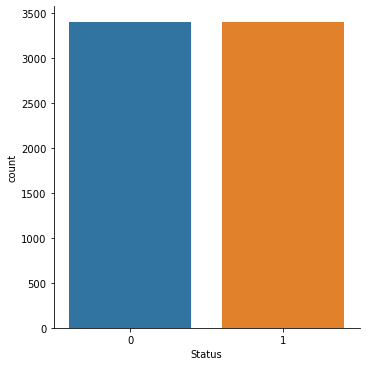

________________________________________________________________________________________________________


In [94]:
#exploring the summary of all the features after combined with synthetic data
get_summary(df_synth,['Status'])

As seen in the above graphs the data has been balanced correctly.

In [54]:
#functions used in this notebook

#function to get the unique values for each featur
def get_summary(df,features):
  for entry in features:
      print('Summary for: "' + entry + '"')
      output = pd.DataFrame({'count':df[entry].value_counts()})
      output['%'] = round(100* (output['count']/len(df[entry])),2)
      print(output)
      print('\n')
      sns.catplot(x=entry,data=df,kind="count")
      #plt.xticks(rotation=90)
      plt.show();
      print('________________________________________________________________________________________________________')


# function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)
